In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
folder='/home/ale/heavyatoms/hullac/Hf/'
experiment=pd.read_csv(folder+"experimento.dat",header='infer',sep='\s+')
diracfock=pd.read_csv(folder+"diracfock.dat",header=None,sep='\s+')
hullac=pd.read_csv(folder+"bindener.res",header=None,sep='\s+')
autoNR=pd.read_csv("/home/ale/AS/Hf/norelat/bindener.dat",header=None,sep='\s+')
autoSR=pd.read_csv("/home/ale/AS/Hf/semirelat/bindener.dat",header=None,sep='\s+')

In [3]:
experiment['erpNR']=abs(experiment.loc[:18]['energy']-abs(autoNR).loc[:18][6])/experiment.loc[:18]['energy']*100
experiment['erpDF']=abs(experiment.loc[:18]['energy']-diracfock.loc[:18][1])/experiment.loc[:18]['energy']*100
experiment['erpR']=abs(experiment.loc[:18]['energy']-hullac.loc[:18][1])/experiment.loc[:18]['energy']*100

In [4]:
experiment['ratioNR']=abs(autoNR).loc[:18][6]/experiment.loc[:18]['energy']
experiment['ratioDF']=diracfock.loc[:18][1]/experiment.loc[:18]['energy']
experiment['ratioR']=hullac.loc[:18][1]/experiment.loc[:18]['energy']

In [5]:
x=hullac.index.tolist()
my_xticks=[r'$1s$',
           r'$2s$',r'$2p_{-}$',r'$2p_{+}$',
           r'$3s$',r'$3p_{-}$',r'$3p_{+}$',r'$3d_{-}$',r'$3d_{+}$',
           r'$4s$',r'$4p_{-}$',r'$4p_{+}$',r'$4d_{-}$',r'$4d_{+}$',
           r'$5s$',r'$5p_{-}$',r'$5p_{+}$',r'$4f_{-}$',r'$4f_{+}$',r'$5d_{-}$',r'$5d_{+}$',
           r'$6s$']

In [6]:
plt.rcParams['font.size']=21
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Times']
# plt.rcParams['font.family'] = ''
# plt.rcParams['font.sans-serif'] = 'Helvetica'
# sans-serif    : Helvetica, Avant Garde, Computer Modern Sans serif
plt.rc('text', usetex=True)

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


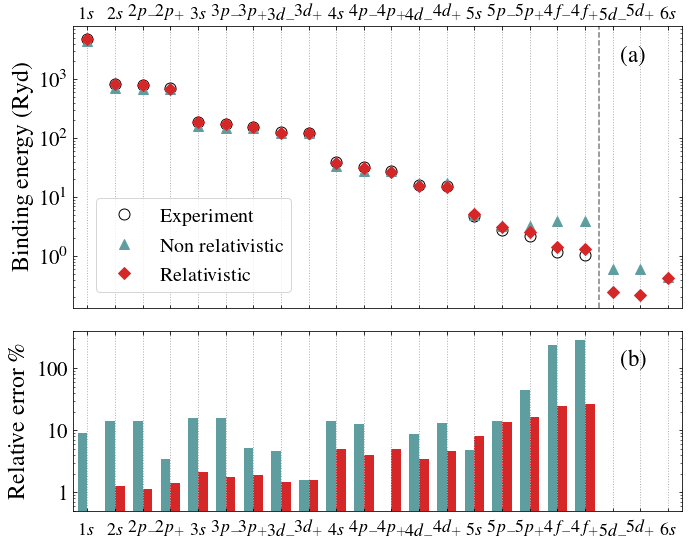

In [101]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(nrows=5, ncols=1)

ax1 = fig.add_subplot(gs[:3,0])
plt.text(0.9,0.87,r'(a)',fontsize=23,transform=ax1.transAxes)
plt.ylabel(r'Binding energy (Ryd)',fontsize=24,labelpad=8)
plt.plot(experiment['energy'],'ko',markersize=11,label='Experiment',markerfacecolor='none',markeredgewidth=1)
plt.plot(-autoNR[6],'^',color='cadetblue',markersize=10,label='Non relativistic')
plt.plot(hullac[1],'D',color='tab:red',markersize=8,label='Relativistic')
plt.axvline(18.5,color='tab:gray',linestyle='dashed')
plt.xlim(-0.5,21.5)
plt.yscale('log')
plt.xticks(x, my_xticks,fontsize=18)
plt.legend(bbox_to_anchor=(0.02, 0.02, 1., 0), loc='lower left',fontsize=20)
plt.grid(which='major', linestyle='dotted', linewidth=1,axis='x')
plt.tick_params(direction='in',axis='x',which='both',bottom=True,top=True,labeltop=True,labelbottom=False)
plt.tick_params(direction='in',axis='y',which='both',right=True,left=True)

ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)
plt.text(0.9,0.8,'(b)',fontsize=23,transform=ax2.transAxes)
plt.ylabel(r'Relative error \%',fontsize=24,labelpad=10)
ax2.bar(experiment.index,experiment['erpNR'],color='cadetblue',width=-0.35, align='edge')
ax2.bar(experiment.index,experiment['erpR'],color='tab:red',width=0.35, align='edge')
plt.yscale('log')
plt.ylim(0.5,400)
ax2.set_xticklabels(my_xticks,y=-0.04,fontsize=18)
plt.grid(which='major', linestyle='dotted', linewidth=1,axis='x')
plt.tick_params(direction='in',axis='x',which='both',bottom=True,top=True,labelbottom=True)
plt.tick_params(direction='in',axis='y',which='both',right=True,left=True)

ax2.set_yticks([1, 10,100])
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10)*.1,numticks=100)
ax2.yaxis.set_minor_locator(locmin)

plt.tight_layout()
plt.savefig('../Hf_bindener_bar.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


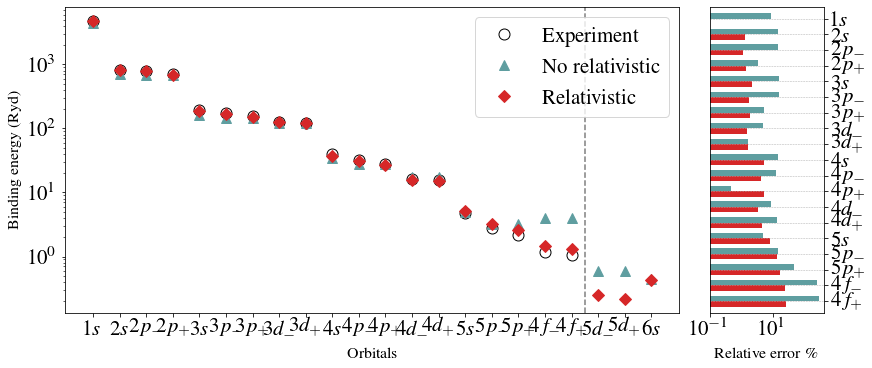

In [66]:
fig = plt.figure(constrained_layout=True,figsize=(12,5))
gs = fig.add_gridspec(nrows=1, ncols=4, left=0.05, right=0.48, wspace=-0.1)
ax1 = fig.add_subplot(gs[0, :-1])
plt.plot(experiment['energy'],'ko',markersize=11,label='Experiment',markerfacecolor='none',markeredgewidth=1)
plt.plot(-autoNR[6],'^',color='cadetblue',markersize=10,label='No relativistic')
plt.plot(hullac[1],'D',color='tab:red',markersize=8,label='Relativistic')
plt.xticks(x, my_xticks)
plt.xlabel('Orbitals',fontsize=16,labelpad=8)
plt.ylabel('Binding energy (Ryd)',fontsize=16,labelpad=8)
plt.axvline(18.5,color='tab:gray',linestyle='dashed')
plt.legend(bbox_to_anchor=(0., 1.0, 1., 0), loc='upper right')
plt.yscale('log')

ax2 = fig.add_subplot(gs[0:, -1])
ax2.barh(experiment.index,experiment['erpNR'],color='cadetblue',height=-0.35, align='edge')
ax2.barh(experiment.index,experiment['erpR'],color='tab:red',height=0.35, align='edge')
plt.xscale('log')
plt.xlabel('Relative error \%',fontsize=16,labelpad=8)
plt.yticks(experiment.index,my_xticks)
plt.xlim(0.1,400)
plt.ylim(-0.75,18.75)
ax2.yaxis.tick_right()
plt.grid(which='major', linestyle='--', linewidth=0.5,axis='y')
ax2.invert_yaxis()  # labels read top-to-bottom
plt.savefig('../Hf_bindener_bar2.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


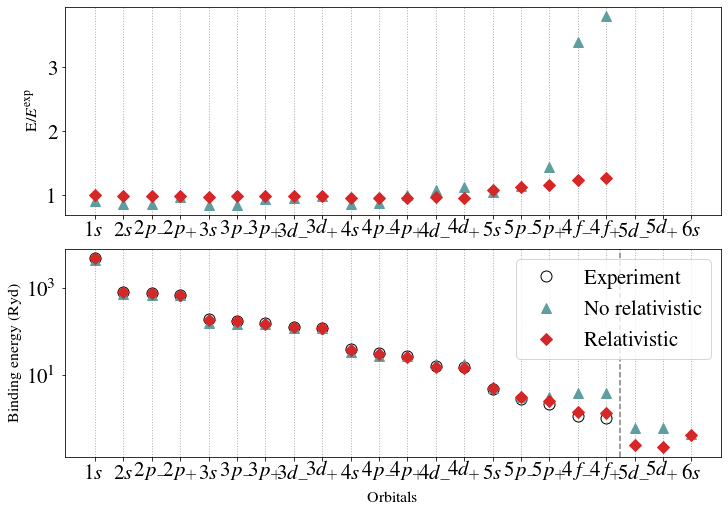

In [67]:
fig = plt.figure(constrained_layout=True,figsize=(10,7))
gs = fig.add_gridspec(nrows=4, ncols=1, left=0.05, right=0.48, wspace=0.05)

ax1 = fig.add_subplot(gs[0:2,0])
plt.ylabel(r'E/$E^{\mathrm{exp}}$',fontsize=16,labelpad=8)
plt.plot(experiment['ratioNR'],'cadetblue',marker='^',markersize=10,linestyle='none')
# plt.plot(experiment['ratioDF'],'tab:green',marker='s',markersize=7,linestyle='none')
plt.plot(experiment['ratioR'],'tab:red',marker='D',markersize=8,linestyle='none')
plt.xticks(x, my_xticks,)
plt.grid(which='major', linestyle='dotted', linewidth=1,axis='x')

ax2 = fig.add_subplot(gs[2:4,0],sharex=ax1)
plt.plot(experiment['energy'],'ko',markersize=11,label='Experiment',markerfacecolor='none')
plt.plot(-autoNR[6],'^',color='cadetblue',markersize=10,label='No relativistic')#,markerfacecolor='none')
# plt.plot(diracfock[1],'s',color='tab:green',markersize=7,label='Dirac-Fock')#,markerfacecolor='none')
plt.plot(hullac[1],'D',color='tab:red',markersize=8,label='Relativistic')
plt.xticks(x, my_xticks,)
plt.xlabel('Orbitals',fontsize=16,labelpad=8)
plt.ylabel('Binding energy (Ryd)',fontsize=16,labelpad=8)
plt.axvline(18.5,color='tab:gray',linestyle='dashed')
plt.legend(bbox_to_anchor=(0., 1.0, 1., 0), loc='upper right')
plt.yscale('log')
plt.grid(which='major', linestyle='dotted', linewidth=1,axis='x')

gs.update(wspace=0.0, hspace=0.0) 
plt.savefig('../Hf_bindener_ratio.eps')
plt.show()

/home/ale/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


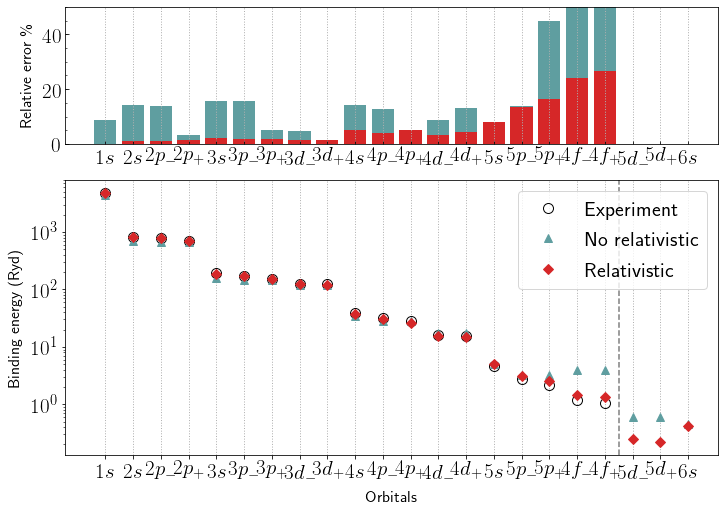

In [10]:
fig = plt.figure(constrained_layout=True,figsize=(10,7))
gs = fig.add_gridspec(nrows=3, ncols=1, left=0.05, right=0.48, wspace=0.05)

ax1 = fig.add_subplot(gs[0,0])
plt.ylabel('Relative error \%',fontsize=16,labelpad=8)
ax1.bar(experiment.index,experiment['erpNR'],color='cadetblue')
ax1.bar(experiment.index,experiment['erpR'],color='tab:red')
plt.xticks(x, my_xticks,)
plt.ylim(0,50)
plt.grid(which='major', linestyle='dotted', linewidth=1,axis='x')
ax1.yaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(direction='in',axis='both', which='minor')
ax1.tick_params(direction='in',axis='both', which='major')

ax2 = fig.add_subplot(gs[1:3,0],sharex=ax1)
plt.plot(experiment['energy'],'ko',markersize=10,label='Experiment',markerfacecolor='none',markeredgewidth=1)
plt.plot(-autoNR[6],'^',color='cadetblue',markersize=8,label='No relativistic')#,markerfacecolor='none')
plt.plot(hullac[1],'D',color='tab:red',markersize=7,label='Relativistic')
plt.xticks(x, my_xticks,)
plt.xlabel('Orbitals',fontsize=16,labelpad=8)
plt.ylabel('Binding energy (Ryd)',fontsize=16,labelpad=8)
plt.axvline(18.5,color='tab:gray',linestyle='dashed')
plt.legend(bbox_to_anchor=(0., 1.0, 1., 0), loc='upper right')
plt.yscale('log')
plt.grid(which='major', linestyle='dotted', linewidth=1,axis='x')

# gs.update(wspace=0.0, hspace=0.0) 
plt.tight_layout()
# plt.savefig('Hf_bindener.eps')
plt.show()